## 문제 정의
- 통신사를 가입한 고객이 통신사를 변경할지를 예측하는 문제

#### 변수 설명
|변수|설명|
|------|---|
|state|미국 고객 거주 주|
|account_length|고객이 현재 통신사와 함께한 월 수|
|area_code|3자리 지역 코드|
|international_plan|고객이 국제적인 계획을 가지고 있는지 여부|
|voice_mail_plan|고객이 음성 메일 계획을 가지고 있는지 여부|
|number_vmail_messages|숫자, 음성 메시지 수|
|total_day_minutes|일일 통화의 총 분|
|total_day_calls|테스트2|
|total_day_charge|테스트2|
|total_eve_minutes|테스트2|
|total_eve_calls|테스트2|
|total_eve_charge|테스트2|
|total_night_minutes|테스트2|
|total_night_calls|테스트2|
|total_night_charge|테스트2|
|total_intl_minutes|테스트2|
|total_intl_calls|테스트2|
|total_intl_charge|테스트2|
|number_customer_service_calls|테스트2|
|churn|테스트2|


In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [86]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls           

- 모든 변수에서 결측값을 존재하지 않는다.
- int형 변수는 7개
- float형 변수는 8개
- object형 변수는 5개

# EDA

In [88]:
train["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

## **이탈 고객 특징 파악하기**

In [89]:
churn_yes = train[train['churn']=="yes"]
churn_no = train[train['churn']=="no"]

In [90]:
churn_yes.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
12,NY,161,area_code_415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,yes
17,CO,77,area_code_408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
26,AZ,12,area_code_408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,yes
32,MD,135,area_code_408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,yes


In [91]:
churn_yes["state"].value_counts()

NJ    26
WV    19
MN    19
MD    19
TX    19
WA    18
MT    17
NV    17
ME    16
NY    16
OK    16
MS    15
MI    15
CT    15
OR    15
KS    15
MA    14
SC    14
DE    13
AL    13
IN    13
ID    12
TN    12
UT    12
OH    12
KY    12
SD    11
AR    11
NH    10
NM    10
MO    10
WY    10
CA    10
VT    10
FL     9
CO     9
PA     8
DC     8
GA     7
NC     7
WI     7
LA     7
AZ     7
IA     7
RI     6
ND     6
IL     6
NE     5
VA     5
AK     4
HI     4
Name: state, dtype: int64

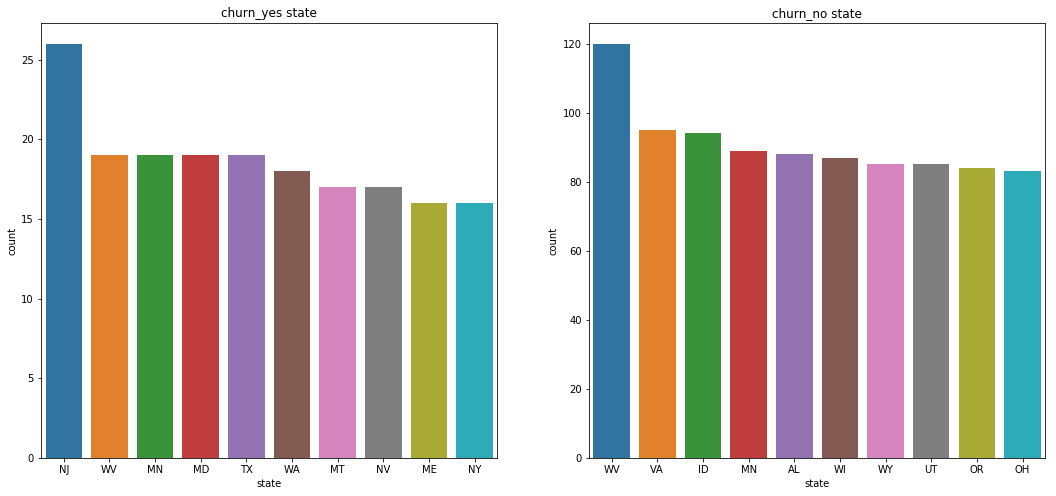

In [92]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))


sns.countplot(x = 'state',
              data = churn_yes,
              ax = ax[0],
              order = churn_yes['state'].value_counts()[:10].index)
# plt.xticks(rotation=90)
ax[0].set_title('churn_yes state')
ax[0].set_ylabel('count')


sns.countplot(x = 'state',
              data = churn_no,
              ax = ax[1],
              order = churn_no['state'].value_counts()[:10].index)
ax[1].set_title('churn_no state')
ax[1].set_ylabel('count')
plt.show()

- **통신사를 바꾼 고객**이 거주하는 상위 주는 New Jersey, West Virginia, Minnesota 등이다.
- **통신사를 바꾸지 않은 고객**이 거주하는 상위 주는 West Virginia, Virginia , Idaho 등이다.

통시사 변경 유무에는 고객들의 거주지가 어느정도 영향을 주는 것으로 보인다.

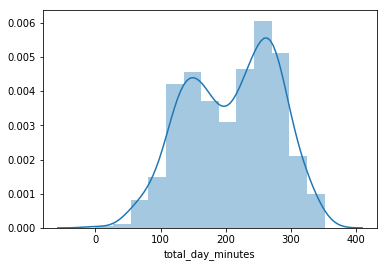

In [93]:
sns.distplot(churn_yes['total_day_minutes'])

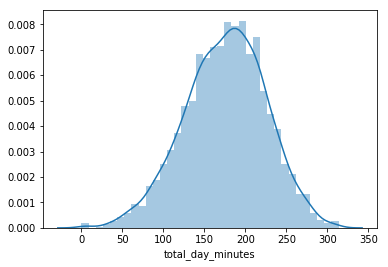

In [94]:
sns.distplot(churn_no['total_day_minutes'])